In [405]:
#第一题
1.1
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the netCDF4 file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

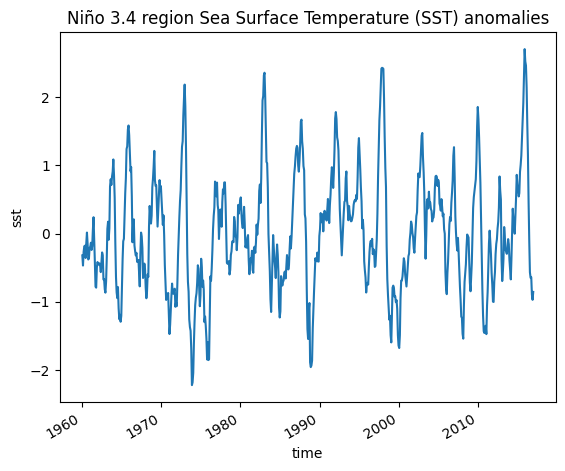

In [406]:
SST_nino34 = ds['sst'].sel(lon=slice(-170 + 360, -120 + 360), lat=slice(-5, 5))
# 计算该区域的月度气候学
climate = SST_nino34.groupby('time.month').mean('time')
# 计算异常值
anomalies = SST_nino34.groupby('time.month') - climate
# 可视化异常值
anomalies.mean(['lon', 'lat']).plot()  # 对经纬度取平均，只显示时间序列
plt.title('Niño 3.4 region Sea Surface Temperature (SST) anomalies')
plt.show()

1.2

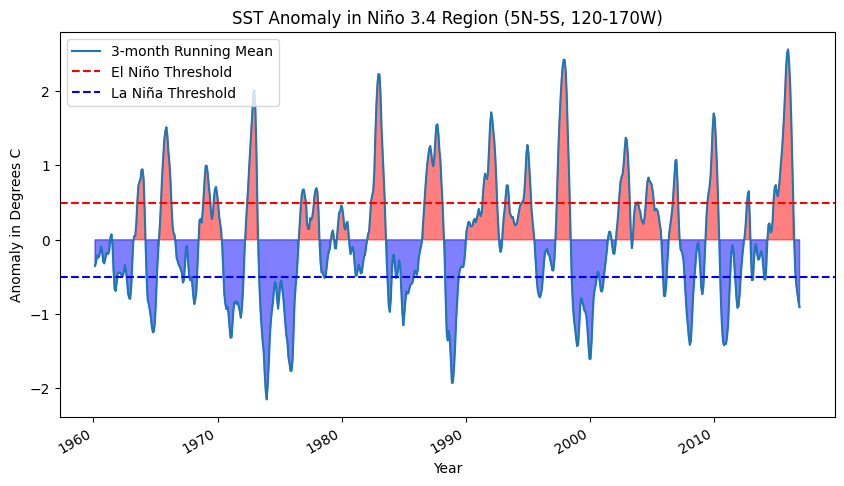

In [407]:
# 应用3个月滑动平均
anomalies_rolling = anomalies.rolling(time=3, center=True).mean()
# 计算异常值的时间平均值
time_avg_anomalies = anomalies_rolling.mean(dim=['lat', 'lon'])
# 绘制图表
plt.figure(figsize=(10, 5))
time_avg_anomalies.plot(label='3-month Running Mean')
plt.axhline(0.5, color='red', linestyle='--', label='El Niño Threshold')
plt.axhline(-0.5, color='blue', linestyle='--', label='La Niña Threshold')
plt.fill_between(time_avg_anomalies.time.values, 0, time_avg_anomalies, where=time_avg_anomalies > 0, color='red',
                 alpha=0.5)
plt.fill_between(time_avg_anomalies.time.values, 0, time_avg_anomalies, where=time_avg_anomalies < 0, color='blue',
                 alpha=0.5)
plt.title('SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend()
plt.show()


#第2题
2.1

In [408]:
ds1 = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds1

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

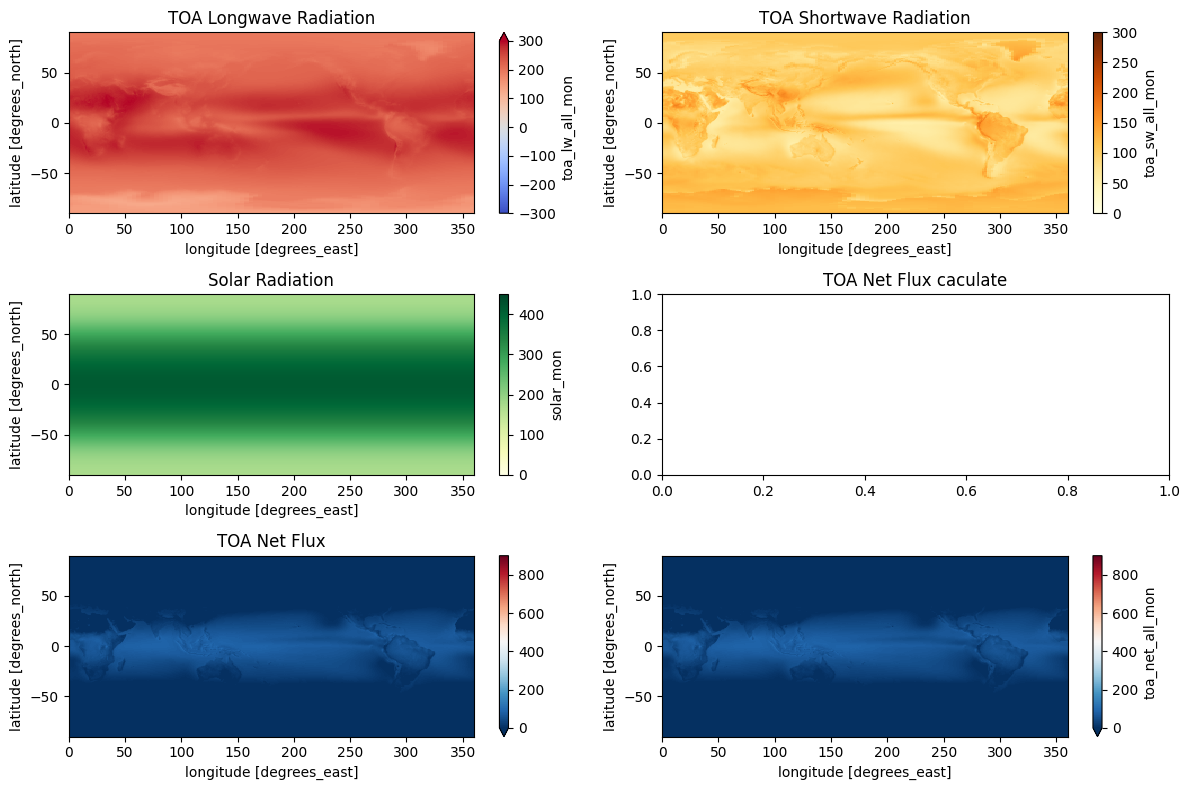

In [409]:
# 计算 TOA 长波、短波和太阳辐射的时间平均
toa_longwave_mean = ds1['toa_lw_all_mon'].mean(dim='time')  
toa_shortwave_mean = ds1['toa_sw_all_mon'].mean(dim='time')
solar_radiation_mean = ds1['solar_mon'].mean(dim='time')
toa_net_all_mon_mean = ds1['toa_net_all_mon'].mean(dim='time')
# 计算 TOA 净辐射
toa_net_flux =  solar_radiation_mean-toa_longwave_mean -toa_shortwave_mean 
# 绘制 2D 图，显示 TOA 长波、短波、太阳辐射和 TOA 净辐射
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
# 绘制 TOA 长波辐射
toa_longwave_mean.plot(ax=axs[0, 0], cmap='coolwarm', vmin=-300, vmax=300)
axs[0, 0].set_title('TOA Longwave Radiation')
# 绘制 TOA 短波辐射
toa_shortwave_mean.plot(ax=axs[0, 1], cmap='YlOrBr', vmin=0, vmax=300)
axs[0, 1].set_title('TOA Shortwave Radiation')
# 绘制太阳辐射
solar_radiation_mean.plot(ax=axs[1, 0], cmap='YlGn', vmin=0, vmax=450)
axs[1, 0].set_title('Solar Radiation')
# 绘制计算出的 TOA 净辐射
toa_net_flux.plot(ax=axs[2, 0], cmap='RdBu_r', vmin=0, vmax=900)
axs[1, 1].set_title('TOA Net Flux caculate')
# 绘制 TOA 净辐射
toa_net_all_mon_mean.plot(ax=axs[2, 1], cmap='RdBu_r', vmin=0, vmax=900)
axs[2, 0].set_title('TOA Net Flux')
#可以看出，结果是一样的
plt.tight_layout()
plt.show()

2.2

In [410]:
# 计算每个网格的面积，假设 'lat' 和 'lon' 是纬度和经度的坐标
grid_area = (
    np.cos(np.radians(ds1['lat'])) *
    np.radians(ds1['lat']).diff('lat') *
    np.radians(ds1['lon']).diff('lon')
)

# 计算 TOA 入射太阳辐射、出射长波辐射和出射短波辐射的全球总量
toa_incoming_solar_global = (ds1['solar_mon'] * grid_area).sum(dim=('lat', 'lon'))
toa_outgoing_longwave_global = (ds1['toa_lw_all_mon'] * grid_area).sum(dim=('lat', 'lon'))
toa_outgoing_shortwave_global = (ds1['toa_sw_all_mon'] * grid_area).sum(dim=('lat', 'lon'))

# 打印全球总量
print("TOA 入射太阳辐射（全球）:", toa_incoming_solar_global.values)
print("TOA 出射长波辐射（全球）:", toa_outgoing_longwave_global.values)
print("TOA 出射短波辐射（全球）:", toa_outgoing_shortwave_global.values)

TOA 入射太阳辐射（全球）: [4307.543  4235.3345 4171.434  4133.851  4130.1216 4162.8115 4220.2573
 4294.9355 4361.37   4403.641  4406.5566 4372.04   4308.549  4235.062
 4172.516  4133.884  4130.764  4160.997  4218.9795 4293.2295 4359.7056
 4402.841  4407.683  4373.1035 4311.098  4236.341  4173.1367 4135.1304
 4128.928  4159.984  4219.1655 4291.455  4358.595  4402.366  4405.9995
 4371.8936 4308.8276 4235.685  4172.215  4133.213  4128.747  4159.6646
 4218.2515 4287.3364 4357.145  4400.414  4403.9917 4369.3984 4306.7715
 4233.8174 4170.2666 4132.227  4127.551  4159.417  4219.1284 4291.614
 4358.356  4400.6504 4402.384  4368.3413 4306.6216 4233.458  4170.0093
 4131.9736 4128.004  4159.4316 4217.6274 4290.521  4357.055  4399.1787
 4402.8765 4368.527  4306.9414 4233.867  4171.093  4132.433  4127.6533
 4158.0186 4216.791  4289.145  4355.833  4398.363  4402.4707 4368.4985
 4307.4785 4234.216  4170.7373 4132.1733 4127.1416 4157.5977 4215.7036
 4288.147  4355.66   4398.4595 4402.969  4368.0527 4305.2446 42

2.3

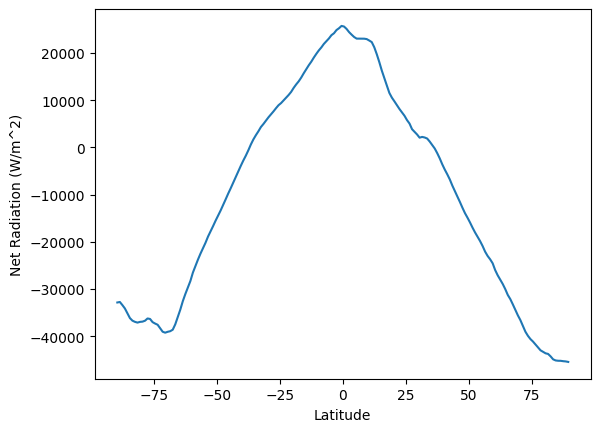

In [411]:
# 选择 'toa_net_all_mon' 变量并按时间求平均
net_radiation = ds1['toa_net_all_mon'].mean(dim='time')
# 按纬度聚合数据，计算每个纬度带的净辐射总和
net_radiation_by_lat = net_radiation.sum(dim='lon')
# 绘图
net_radiation_by_lat.plot()
# 设置图表标题和标签
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.show()

2.4

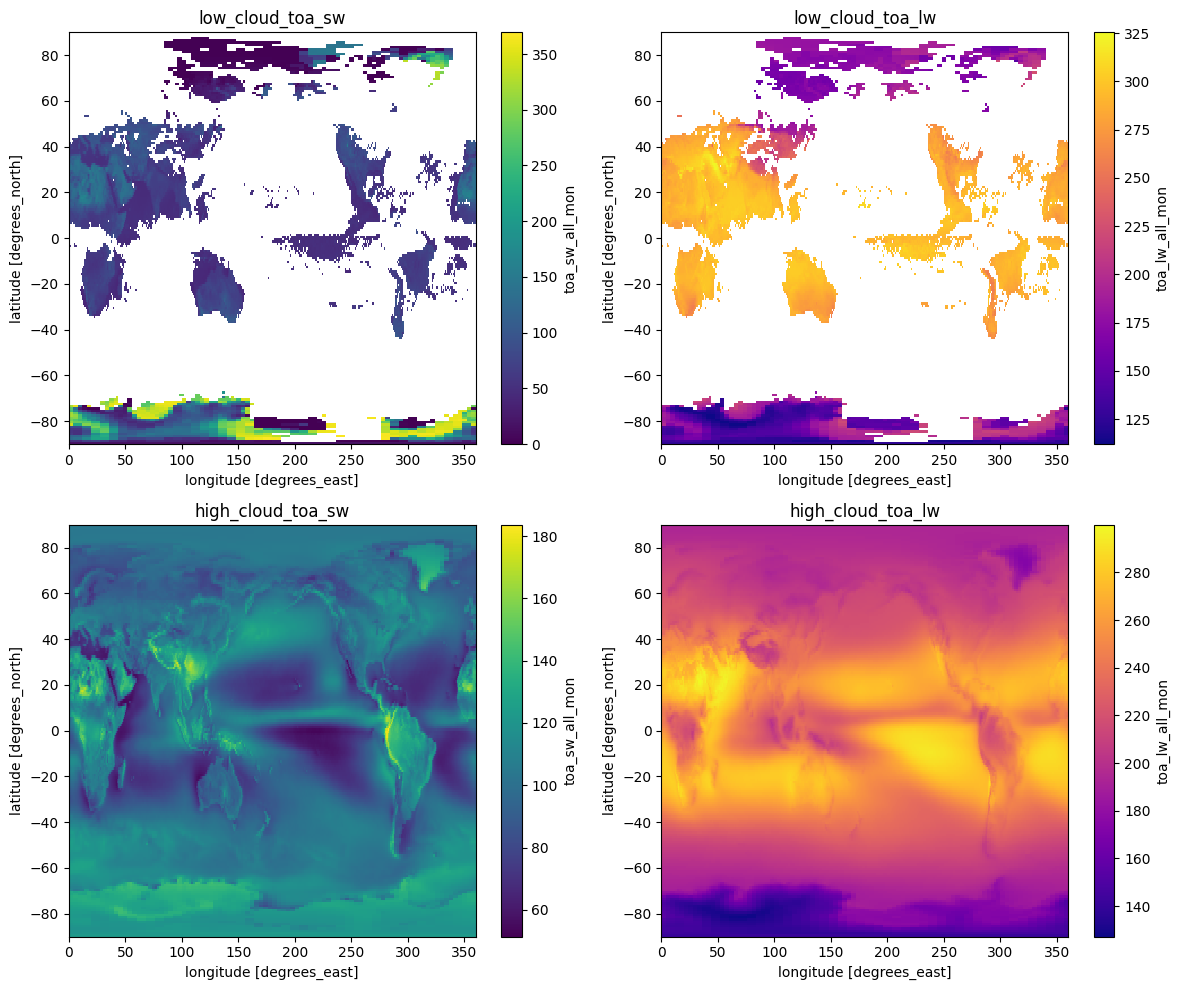

In [412]:
# 定义低云和高云的阈值
low_cloud_threshold = 25
high_cloud_threshold = 7
# 根据云覆盖率定义低云和高云区域
low_cloud_area = ds1['cldarea_total_daynight_mon'] < low_cloud_threshold
high_cloud_area = ds1['cldarea_total_daynight_mon'] > high_cloud_threshold
# 计算低云和高云区域的时间平均出射短波和长波辐射
shortwave_low_cloud = ds1['toa_sw_all_mon'].where(low_cloud_area).mean(dim='time')
longwave_low_cloud = ds1['toa_lw_all_mon'].where(low_cloud_area).mean(dim='time')
shortwave_high_cloud = ds1['toa_sw_all_mon'].where(high_cloud_area).mean(dim='time')
longwave_high_cloud = ds1['toa_lw_all_mon'].where(high_cloud_area).mean(dim='time')
# 绘制低云和高云区域的出射短波和长波辐射组合
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
shortwave_low_cloud.plot(ax=axes[0, 0], cmap='viridis')
axes[0, 0].set_title('low_cloud_toa_sw')
longwave_low_cloud.plot(ax=axes[0, 1], cmap='plasma')
axes[0, 1].set_title('low_cloud_toa_lw')
shortwave_high_cloud.plot(ax=axes[1, 0], cmap='viridis')
axes[1, 0].set_title('high_cloud_toa_sw')
longwave_high_cloud.plot(ax=axes[1, 1], cmap='plasma')
axes[1, 1].set_title('high_cloud_toa_lw')
plt.tight_layout()
plt.show()

2.5

In [413]:
# 定义低云和高云的阈值
low_cloud_threshold = 25
high_cloud_threshold = 75
# 根据云覆盖率定义低云和高云区域
low_cloud_area = ds1['cldarea_total_daynight_mon'] <= low_cloud_threshold
high_cloud_area = ds1['cldarea_total_daynight_mon'] >= high_cloud_threshold
# 计算低云和高云区域的全球平均出射短波和长波辐射
global_mean_shortwave_low_cloud = (
    (ds1['toa_sw_all_mon'] * low_cloud_area).sum(dim=['lat', 'lon', 'time']) /
    low_cloud_area.sum(dim=['lat', 'lon', 'time'])
)
global_mean_longwave_low_cloud = (
    (ds1['toa_lw_all_mon'] * low_cloud_area).sum(dim=['lat', 'lon', 'time']) /
    low_cloud_area.sum(dim=['lat', 'lon', 'time'])
)
global_mean_shortwave_high_cloud = (
    (ds1['toa_sw_all_mon'] * high_cloud_area).sum(dim=['lat', 'lon', 'time']) /
    high_cloud_area.sum(dim=['lat', 'lon', 'time'])
)
global_mean_longwave_high_cloud = (
    (ds1['toa_lw_all_mon'] * high_cloud_area).sum(dim=['lat', 'lon', 'time']) /
    high_cloud_area.sum(dim=['lat', 'lon', 'time'])
)
# 打印全球平均值
print("全球平均低云区域短波辐射:", global_mean_shortwave_low_cloud.values)
print("全球平均低云区域长波辐射:", global_mean_longwave_low_cloud.values)
print("全球平均高云区域短波辐射:", global_mean_shortwave_high_cloud.values)
print("全球平均高云区域长波辐射:", global_mean_longwave_high_cloud.values)

全球平均低云区域短波辐射: 97.11116175716484
全球平均低云区域长波辐射: 247.3310922454561
全球平均高云区域短波辐射: 111.76594124698039
全球平均高云区域长波辐射: 215.39049391670886


第三题 3.1

In [414]:
ds2 = xr.open_dataset("air.mon.mean.nc", engine="netcdf4")
ds2

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 909)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-09-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

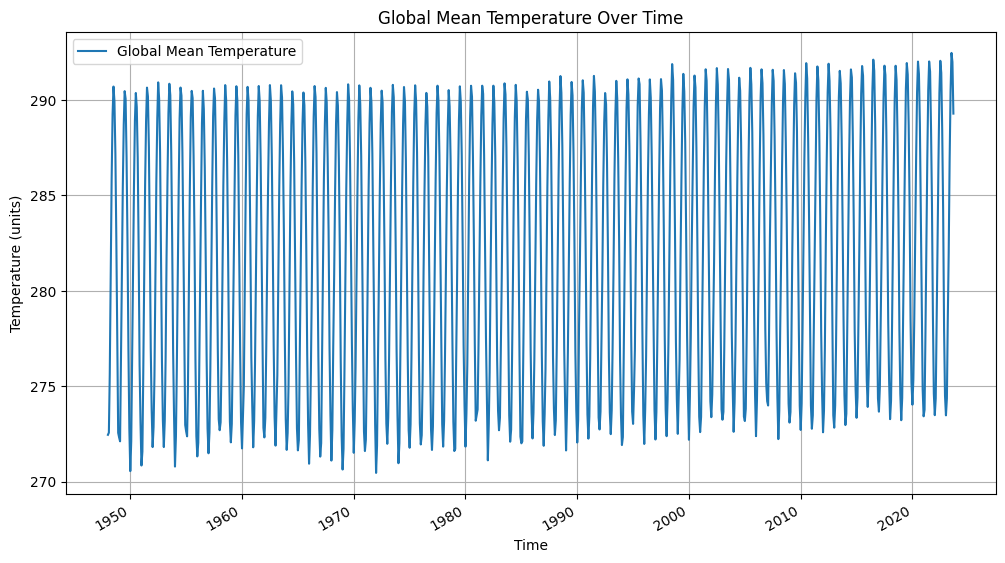

In [415]:
#月平均温度
air_T=ds2['air']
air_T
global_mean_temp=air_T.mean(dim=('lat','lon'))
plt.figure(figsize=(12,6))
global_mean_temp.plot(label="Global Mean Temperature")
global_mean_temp
plt.title("Global Mean Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (units)")  # 请替换为实际的温度单位
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<xarray.DataArray 'air' (time: 76)>
array([281.41174, 281.2741 , 281.00327, 281.2777 , 281.31116, 281.64566,
       281.269  , 281.171  , 280.83377, 281.27628, 281.39447, 281.37952,
       281.2976 , 281.35953, 281.54813, 281.47592, 280.9491 , 281.1241 ,
       281.10904, 281.34842, 281.14456, 281.1424 , 281.25122, 281.1873 ,
       280.941  , 281.57358, 281.0097 , 281.43256, 281.0044 , 281.5059 ,
       281.30066, 281.30484, 281.5361 , 281.90033, 281.22455, 281.6887 ,
       281.28625, 281.31253, 281.43362, 281.48993, 281.87314, 281.66483,
       281.93515, 281.86435, 281.473  , 281.64944, 281.7774 , 282.2464 ,
       281.7231 , 282.00327, 282.34113, 282.1132 , 282.07758, 282.28415,
       282.38812, 282.4481 , 282.1472 , 282.6324 , 282.47037, 282.61972,
       282.35333, 282.29874, 282.6681 , 282.4708 , 282.4659 , 282.45987,
       282.55823, 282.85977, 283.12967, 282.9027 , 282.5975 , 283.0219 ,
       283.19757, 282.86707, 282.8326 , 284.35577], dtype=float32)
Coordinates:
  * time

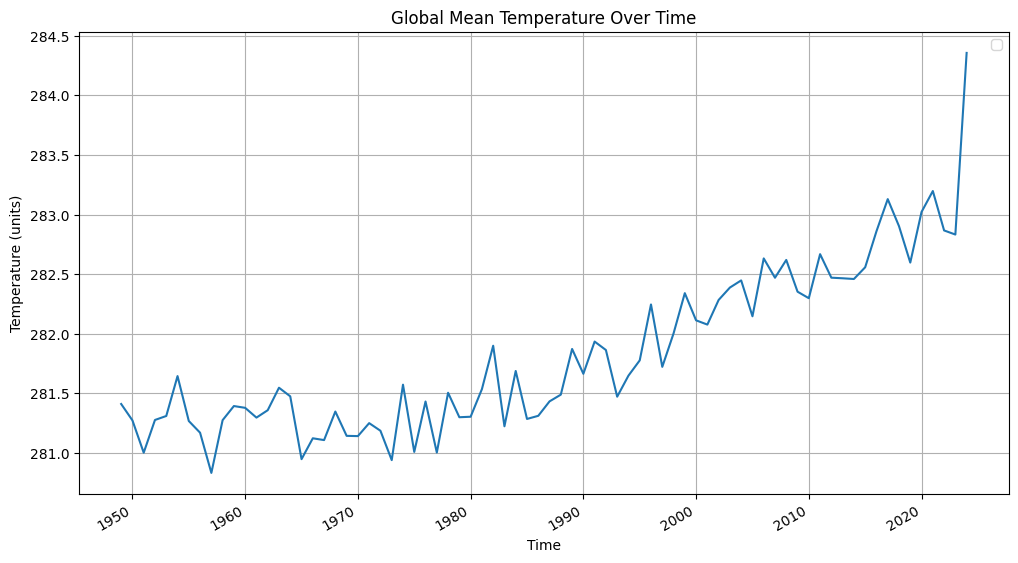

In [416]:
#年平均温度
annual_mean_temperature =air_T.resample(time='Y').mean(dim=('time'))
global_mean_temp_Y=annual_mean_temperature.mean(dim=('lat','lon'))
print(global_mean_temp_Y)
plt.figure(figsize=(12, 6))
global_mean_temp_Y.plot()
plt.title("Global Mean Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (units)")  # 请替换为实际的温度单位
plt.legend()
plt.grid(True)
plt.show()

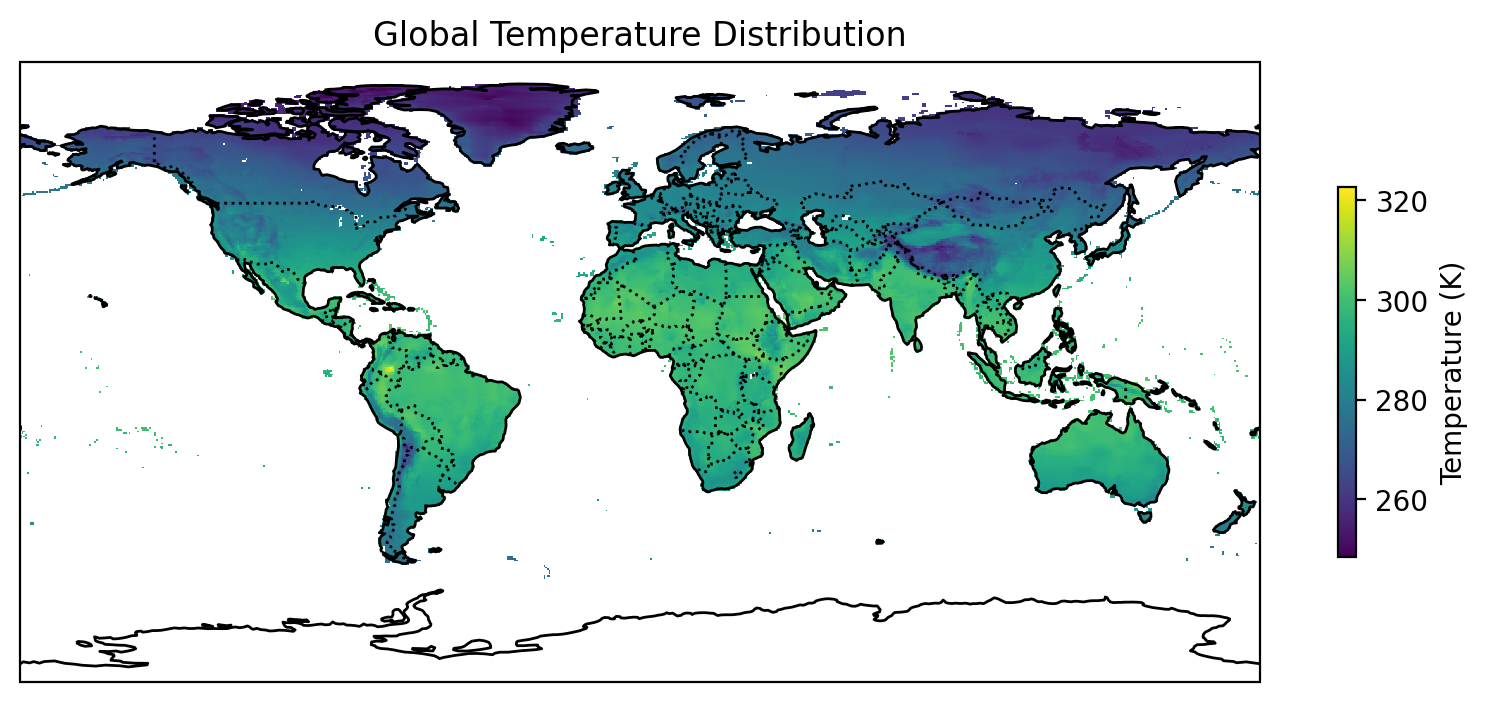

In [417]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
air_T_1=ds2['air']
# 绘制全球温度分布图
plt.figure(figsize=(10, 6),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
air_T_1.mean(dim='time').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Temperature (K)','shrink':0.4})
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
plt.title('Global Temperature Distribution')
plt.show()



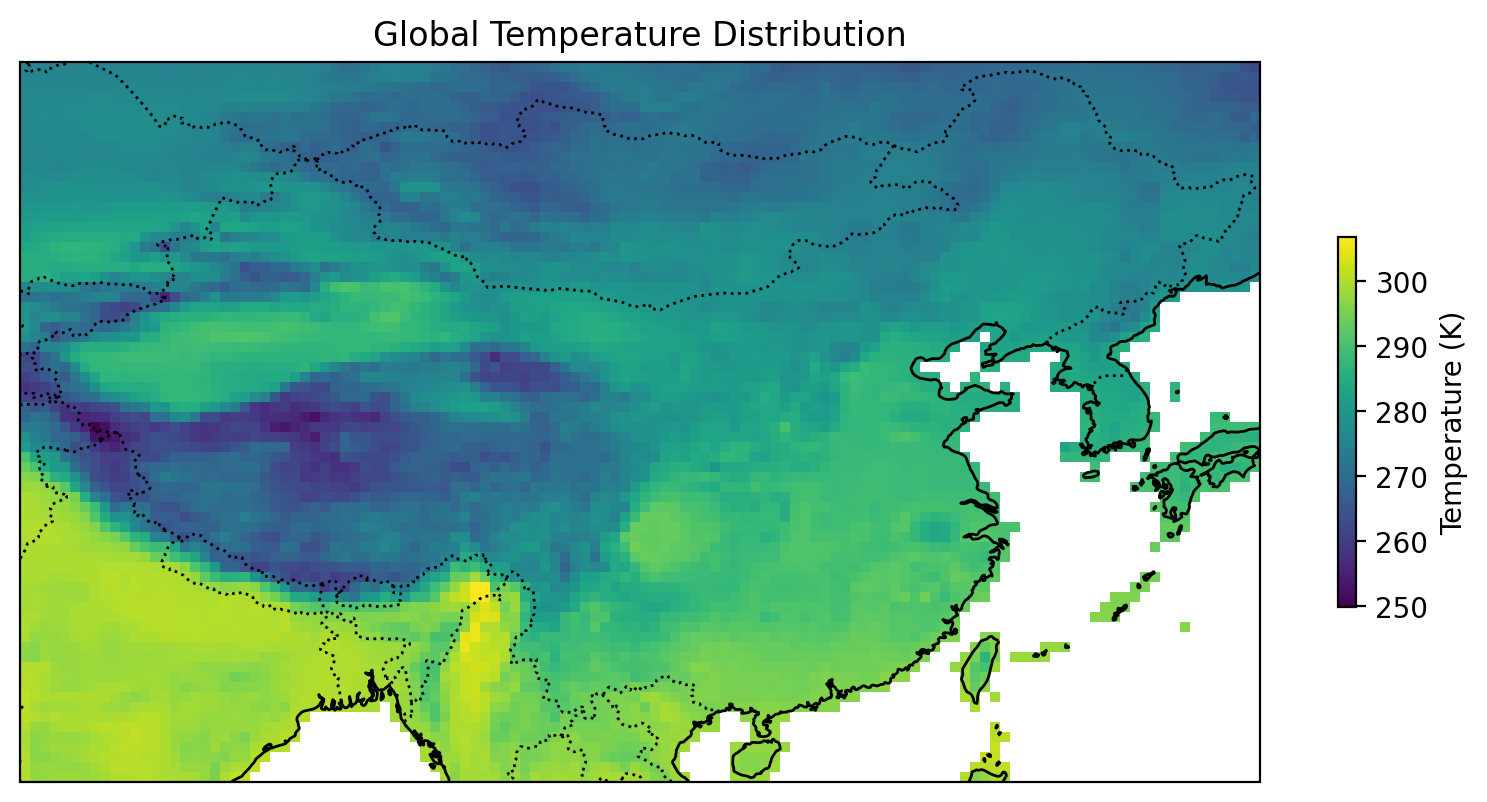

In [418]:
#画中国的温度分布
# 选择中国的经纬度范围（示例中为经度：73至135，纬度：18至54）

air_T_1=ds2['air']
temperature_china = air_T_1.sel(lon=slice(73, 135), lat=slice(54, 18))
temperature_china# 绘制中国的平均温度图
plt.figure(figsize=(10, 6),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
temperature_china.mean(dim='time').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Temperature (K)','shrink':0.4})
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
plt.title('Global Temperature Distribution')
plt.show()

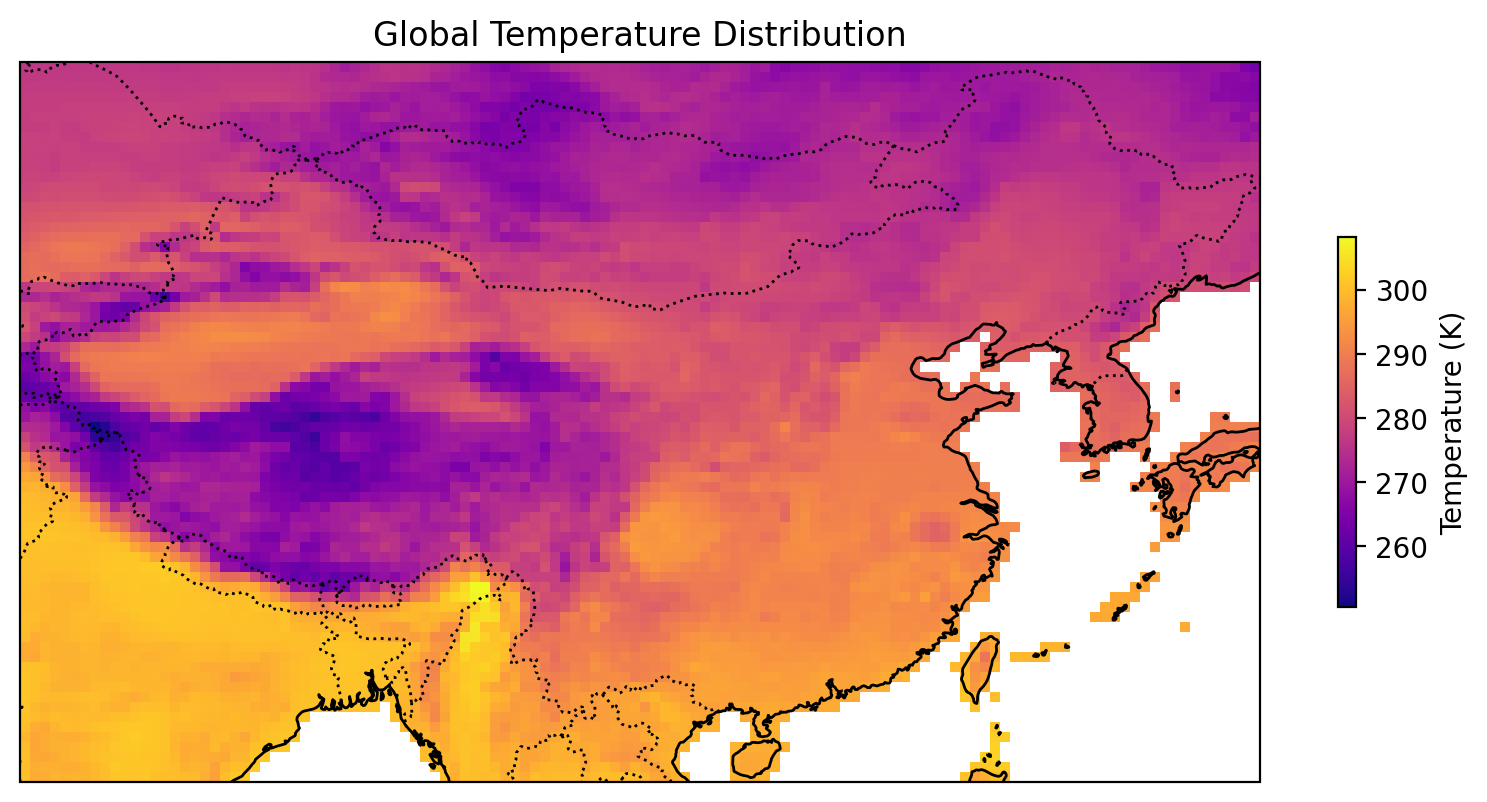

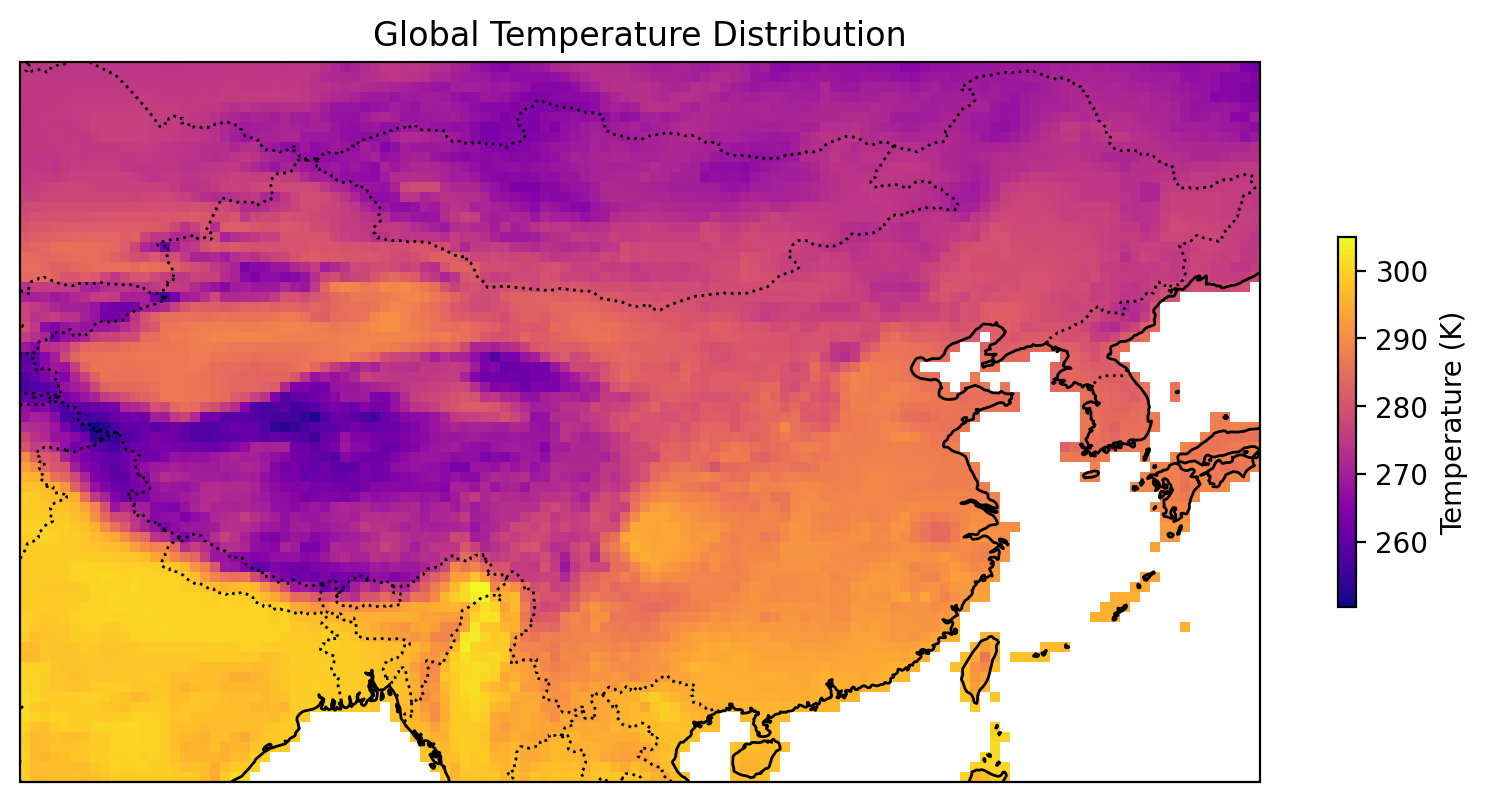

In [419]:
#绘制2022年的平均温度
air_T_1=ds2['air']
temperature_china = air_T_1.sel(lon=slice(73, 135), lat=slice(54, 18))
temperature_china['time'] = pd.to_datetime(temperature_china['time'].values)
temperature_china
temperature_china2022=temperature_china.sel(time=slice('2022-01-01','2022-12-01'))
# 绘制中国的2022平均温度图
plt.figure(figsize=(10, 6),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
temperature_china2022.mean(dim='time').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma', cbar_kwargs={'label': 'Temperature (K)','shrink':0.4})
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
plt.title('Global Temperature Distribution')
plt.show()
temperature_china1949=temperature_china.sel(time=slice('1949-01-01','1949-12-01'))
# 绘制中国的1949平均温度图
plt.figure(figsize=(10, 6),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
temperature_china1949.mean(dim='time').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma', cbar_kwargs={'label': 'Temperature (K)','shrink':0.4})
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
plt.title('Global Temperature Distribution')
plt.show()